In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resample(p0,theta,n=1000000,alpha=None):
    # Generate a sample set of weights (posterior)
    #
    # p0 is the reference set of weights
    # alpha is the parameter for dirichlet (by default, an array of ones)
    # n is the size of the sample (make sure histograms are smooth)
    # theta is the hyperparameter in BioEM
    p0=np.array(p0).copy()
    p0/=np.sum(p0)
    if alpha is None:
        alpha=[1.0]*len(p0)
    traj=np.random.dirichlet(alpha,size=n)
    # we generate from dirichlet
    w=np.exp(-theta*np.sum(traj*np.log(traj/p0),axis=1))
    # then compute weights using exp(theta*S)
    # no experimental data here
    w/=np.sum(w)
    return traj,w

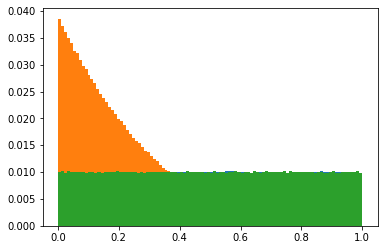

In [3]:
# two states, probability 60% and 40%, theta=0, ignore p0 (pure prior on distribution)
traj,w=resample([0.6,0.4],0)
# split second state
traj2,w2=resample([0.6,0.1,0.1,0.1,0.1],0)
# split second state with consistent alpha
traj3,w3=resample([0.6,0.1,0.1,0.1,0.1],0,alpha=[1.0,0.25,0.25,0.25,0.25])

# plot hisogram of the weights of the first state (should be NOT affected by how how we
# describe second state)
plt.hist(traj[:,0],weights=w,bins=100)
plt.hist(traj2[:,0],weights=w2,bins=100)
plt.hist(traj3[:,0],weights=w3,bins=100)
plt.show()
# as expected, it is affected in case 2 but not affected in case 3

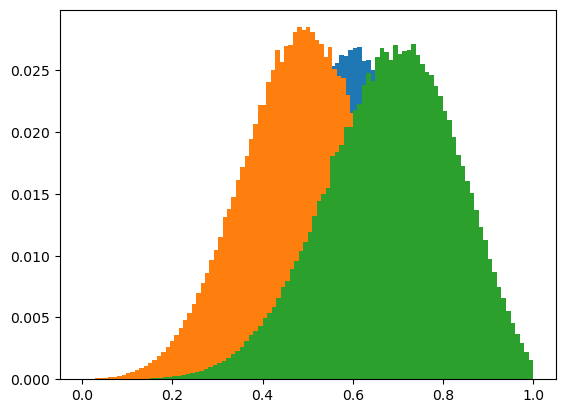

In [4]:
# two states, probability 60% and 40%, theta=10, use p0
traj,w=resample([0.6,0.4],10)
# split second state
traj2,w2=resample([0.6,0.1,0.1,0.1,0.1],10)
# split second state with consistent alpha
traj3,w3=resample([0.6,0.1,0.1,0.1,0.1],10,alpha=[1.0,0.25,0.25,0.25,0.25])

# plot hisogram of the weights of the first state (should be NOT affected by how how we
# describe second state)
plt.hist(traj[:,0],weights=w,bins=100)
plt.hist(traj2[:,0],weights=w2,bins=100)
plt.hist(traj3[:,0],weights=w3,bins=100)
plt.show()
# as expected, it is affected in case 2
# to my surprise, it is affected also in case 3
# this means that making sure that the sum of the weights of states 2,3,4,5
# is a dirichlet with alpha=1.0 is not sufficient to have the same result
# that we have with a single state

In [5]:
# two states, probability 60% and 40%, theta=10, use p0
traj,w=resample([0.6,0.4],10)
# split second state
traj2,w2=resample([0.6,0.1,0.1,0.1,0.1],10)
# split second state with consistent alpha
traj3,w3=resample([0.6,0.1,0.1,0.1,0.1],10,alpha=[1.0,0.25,0.25,0.25,0.25])

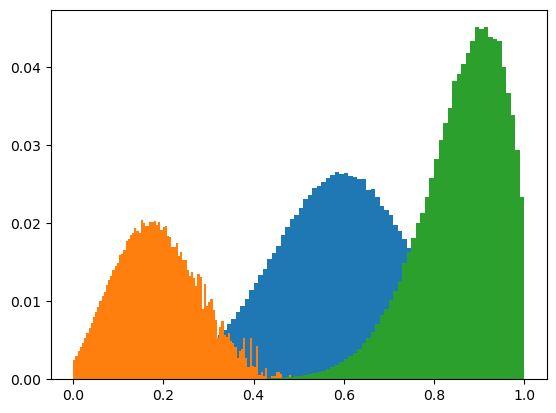

In [6]:
# try again with more substates
N=20
p0=[0.6]; p0.extend([0.4/N]*N)
a=[1.0]; a.extend([1.0/N]*N)
traj,w=resample([0.6,0.4],10)
traj2,w2=resample(p0,10)
traj3,w3=resample(p0,10,alpha=a)
plt.hist(traj[:,0],weights=w,bins=100)
plt.hist(traj2[:,0],weights=w2,bins=100)
plt.hist(traj3[:,0],weights=w3,bins=100)
plt.show()